# 1.1 Loading in Imports

In [2]:
# Importing all the packages need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
import torch
import torch.utils
import torch.utils.data
from torch.utils.data import  TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader

# 1.2 Importing the data

In [6]:
# This makes all rows of a df display in the output
pd.set_option('display.max_rows', None)

# Import the data from a csv file
# Copy the feature class into a seperate df and remove it from the original
df = pd.read_csv("stars_data.csv")
df_classes = df.iloc[:,-1]
df = df.drop('Spectral Class', axis=1)

# For analysis purpose for each features display the largest and small values (range)
for name, data in df.items():
    print("For Column:",name)
    print("Max-value:",max(data),"Min-value:",min(data))

# The feature color needs hot one encoding 
# To do this we use the get dummies function
# Then we drop the original feature colour from the df
one_hot_encode = pd.get_dummies(df['Star color'])
df = df.drop('Star color',axis=1)

# To improve accuracy of our models we need to normalize the features in the data
# The features that can be normalized are put into their own df
df_norm = df.iloc[:,0:4]

# Iterate over the features in the df just created
# For every column its converted into a np.array
# Then all the values in the array are normalized using the L2 method
# This normalized array is now added back to the dictionary
norm_dict = {}
for name, data  in df_norm.items():
    array_attr = (np.array(data)).reshape(1,-1)
    norm_attr = preprocessing.normalize(array_attr)
    norm_attr = norm_attr.tolist()
    norm_attr = norm_attr[0]
    norm_dict[name] = norm_attr


# The normalized dictionary is converted to a df
# The normalized features are joined with the other categorical features
df_norm = pd.DataFrame(norm_dict)
df_norm = df_norm.join(df.iloc[:,4])

# A copy of the df is made that will be used to visualise the data
df_boxplot = df_norm
df_boxplot = df_boxplot.join(df_classes)

# The one-hot encoded values are joined back to the df
one_hot_encode = one_hot_encode.astype(int)
df_norm = df_norm.join(one_hot_encode)

# The number of samples in each class is visulaised
num_classes = df_classes.value_counts()
print(num_classes)

# This seperates the features into their own data set
df_features = df_norm.iloc[:,0:24]



For Column: Temperature (K)
Max-value: 40000 Min-value: 1939
For Column: Luminosity(L/Lo)
Max-value: 849420.0 Min-value: 8e-05
For Column: Radius(R/Ro)
Max-value: 1948.5 Min-value: 0.0084
For Column: Absolute magnitude(Mv)
Max-value: 20.06 Min-value: -11.92
For Column: Star type
Max-value: 5 Min-value: 0
For Column: Star color
Max-value: yellowish Min-value: Blue
Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64


# 1.3 Class feature Distribution


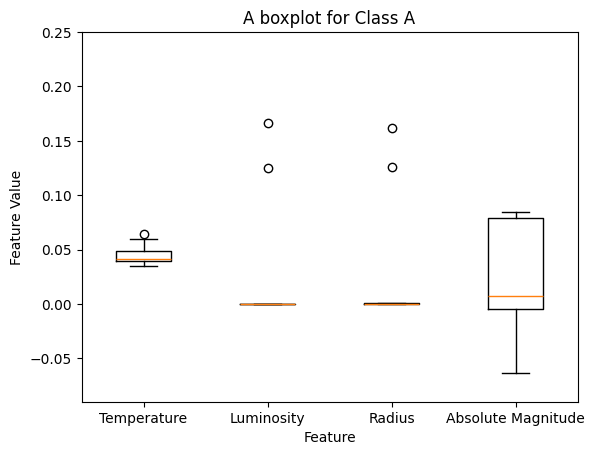

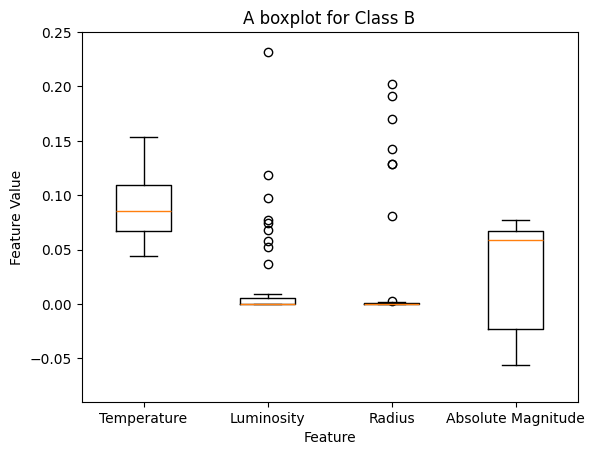

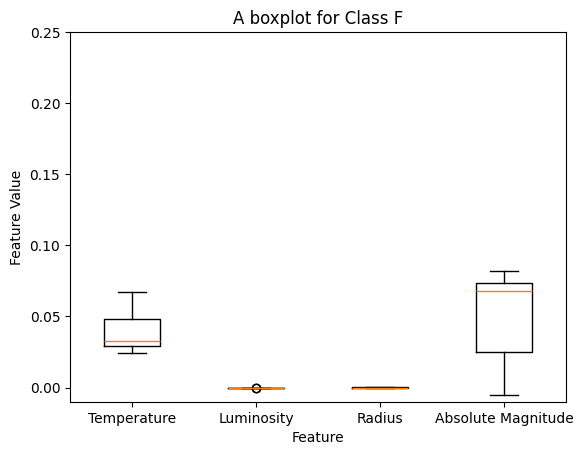

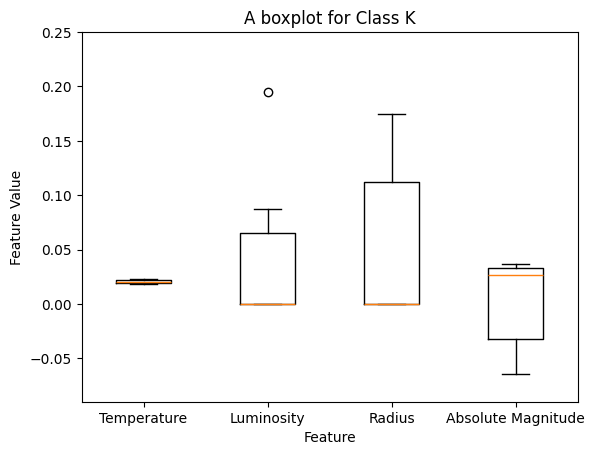

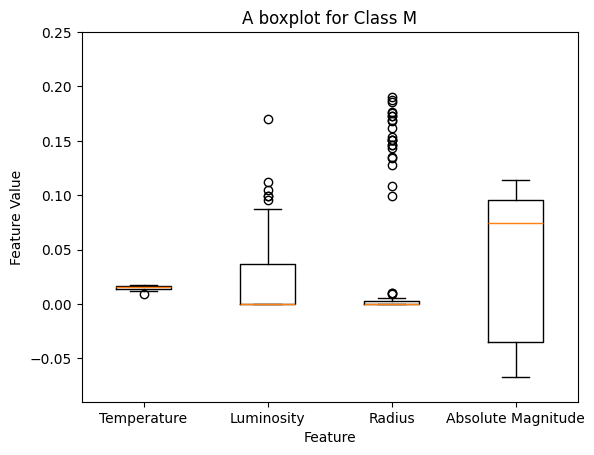

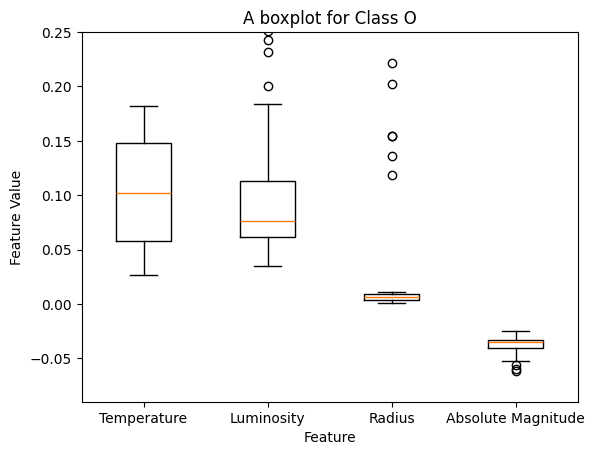

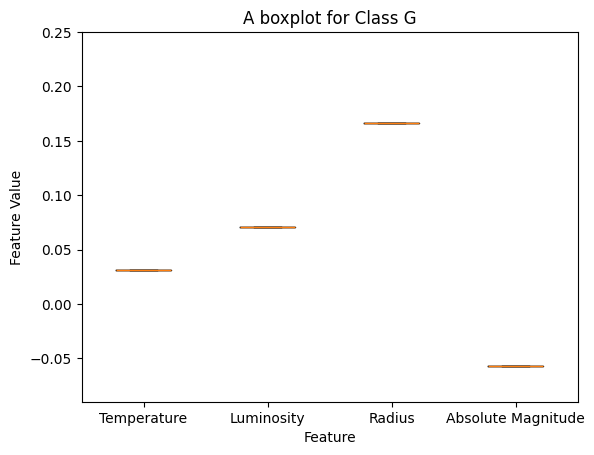

In [7]:
# Seperates the data set by it class
df_classA = df_boxplot.loc[df_boxplot["Spectral Class"]=="A"]
df_classB = df_boxplot.loc[df_boxplot["Spectral Class"]=="B"]
df_classF = df_boxplot.loc[df_boxplot["Spectral Class"]=="F"]
df_classK = df_boxplot.loc[df_boxplot["Spectral Class"]=="K"]
df_classM = df_boxplot.loc[df_boxplot["Spectral Class"]=="M"]
df_classO = df_boxplot.loc[df_boxplot["Spectral Class"]=="O"]
df_classG = df_boxplot.loc[df_boxplot["Spectral Class"]=="G"]

labels = ["Temperature", "Luminosity", "Radius", "Absolute Magnitude"]

# seven boxplots which show the range of values each features takes for that specific class

plt.boxplot(df_classA.iloc[:,0:4])
plt.xticks(range(1, 5), labels)
plt.ylim([-0.09,0.25])
plt.xlabel("Feature")
plt.ylabel("Feature Value")
plt.title("A boxplot for Class A")
plt.show()

plt.boxplot(df_classB.iloc[:,0:4])
plt.xticks(range(1, 5), labels)
plt.ylim([-0.09,0.25])
plt.xlabel("Feature")
plt.ylabel("Feature Value")
plt.title("A boxplot for Class B")
plt.show()

plt.boxplot(df_classF.iloc[:,0:4])
plt.xticks(range(1, 5), labels)
plt.ylim([-0.01,0.25])
plt.xlabel("Feature")
plt.ylabel("Feature Value")
plt.title("A boxplot for Class F")
plt.show()

plt.boxplot(df_classK.iloc[:,0:4])
plt.xticks(range(1, 5), labels)
plt.ylim([-0.09,0.25])
plt.xlabel("Feature")
plt.ylabel("Feature Value")
plt.title("A boxplot for Class K")
plt.show()

plt.boxplot(df_classM.iloc[:,0:4])
plt.xticks(range(1, 5), labels)
plt.ylim([-0.09,0.25])
plt.xlabel("Feature")
plt.ylabel("Feature Value")
plt.title("A boxplot for Class M")
plt.show()

plt.boxplot(df_classO.iloc[:,0:4])
plt.xticks(range(1, 5), labels)
plt.ylim([-0.09,0.25])
plt.xlabel("Feature")
plt.ylabel("Feature Value")
plt.title("A boxplot for Class O")
plt.show()

plt.boxplot(df_classG.iloc[:,0:4])
plt.xticks(range(1, 5), labels)#
plt.ylim([-0.09,0.25])
plt.xlabel("Feature")
plt.ylabel("Feature Value")
plt.title("A boxplot for Class G")
plt.show()


# 1.4 Splitting the Data

In [8]:
def Data_split(df_features, df_classes,seed):
    # splits feature and class df into 4 df's
    # 2 being the training features and testing features
    # The other 2 being the training class and testing class
    # Train data is 80% of the data, a random state is defined to give a consistent split
    train_data, test_data, train_class, test_class = train_test_split(df_features,df_classes,train_size=0.8,random_state=seed)
    test_class = pd.DataFrame(test_class)
    test_class_list = test_class['Spectral Class'].tolist()
    return train_data, test_data, train_class, test_class_list


DATA = Data_split(df_features,df_classes,74)
# outputs all 4 df's
print("The training features\n",DATA[0])
print("The testing features\n",DATA[1])
print("The training classes\n",DATA[2])
print("The test classes, in list form\n",DATA[3])

# Defines the 6 groups when testing the models
star_groups = ["A","B","F","K","M","O"]

The training features
      Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
106         0.112122      1.122797e-01  7.160058e-03               -0.033047   
165         0.033149      4.051968e-02  2.727641e-03               -0.040926   
77          0.015214      4.639658e-10  3.489108e-05                0.067284   
177         0.050075      5.258279e-02  2.021864e-01               -0.056117   
120         0.015127      1.330035e-10  1.036504e-05                0.097270   
216         0.042427      8.970005e-06  2.170748e-04                0.007006   
55          0.015705      8.134867e-02  1.533162e-01               -0.066604   
204         0.083488      4.144761e-10  1.409281e-06                0.063600   
88          0.062457      5.567589e-11  1.013773e-06                0.073520   
142         0.083261      4.021037e-10  1.061507e-06                0.072443   
239         0.172448      9.121660e-02  2.026410e-01               -0.044214   
68          0.012

# 2.1 Random Forest


# 2.2 Using K-Cross fold validation to tune hyper parameters

             accuracy  precision    recall  f1-score
No of Trees                                         
1            0.812500   0.846232  0.812500  0.821691
3            0.870833   0.860636  0.870833  0.861431
5            0.858333   0.851259  0.858333  0.850721
7            0.862500   0.867227  0.862500  0.858769
9            0.887500   0.897605  0.887500  0.882980
11           0.879167   0.887211  0.879167  0.874829
13           0.883333   0.902170  0.883333  0.882571
15           0.879167   0.892995  0.879167  0.878674
17           0.866667   0.883540  0.866667  0.866427
19           0.866667   0.881606  0.866667  0.866015
21           0.870833   0.880317  0.870833  0.866436
23           0.870833   0.880317  0.870833  0.866436
25           0.866667   0.877817  0.866667  0.862719
27           0.866667   0.877817  0.866667  0.862719
29           0.870833   0.880317  0.870833  0.866436
31           0.866667   0.877817  0.866667  0.862719
33           0.870833   0.882499  0.870833  0.

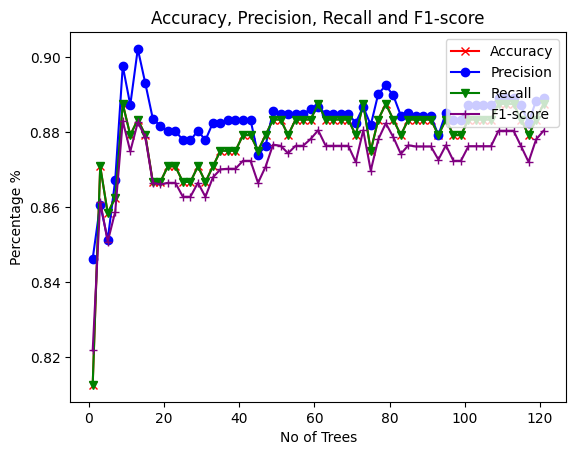

In [9]:
import warnings; warnings.simplefilter('ignore')
def Dataframe_Creator(parameter_list, accuracy_list, precision_list, recall_list, f1_score_list, parameter_name):
    # Creates a dictionary frame work
    data_frame_dict = { str(parameter_name) : parameter_list,
                       "accuracy" : accuracy_list,
                       "precision" : precision_list,
                       "recall" : recall_list,
                       "f1-score" : f1_score_list
    }
    # Converts dictionary to pd df
    data_frame_evaluators = pd.DataFrame(data_frame_dict)
    data_frame_evaluators.set_index(parameter_name,drop=True,inplace=True)
    return data_frame_evaluators


def Line_plot(parameter_list, parameter_name, accuracy_list, precision_list, recall_list, f1_score_list):
    # Creates line graph for evaluation metrics
    plt.plot(parameter_list,accuracy_list,color="red",marker ="x")
    plt.plot(parameter_list,precision_list,color="blue", marker="o")
    plt.plot(parameter_list,recall_list,color="green", marker="v")
    plt.plot(parameter_list,f1_score_list,color="purple", marker="+")
    plt.legend(["Accuracy","Precision","Recall","F1-score"], loc="upper right")
    plt.xlabel(parameter_name)
    plt.ylabel("Percentage %")
    plt.title("Accuracy, Precision, Recall and F1-score")
    plt.show()

def KCross_Validation(parameter_name, min_val, max_val, iteration):
    # lists to store the avg metrics of tested parameter values
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []
    # creates 2 matricies, of the features df and class df
    # this is so we can itterate over them
    f_matrix = df_features.to_numpy()
    c_matrix = df_classes.to_numpy()
    # sets up the K-fold class
    # determins the number of folds in out in our Cross Validation
    kf = KFold(n_splits=5)
    # list of all parameter values tested
    parameter_list = []
    # Iterates throught the values of the parameter, defined by the input parameter of the function
    for parameter_no in range(min_val,max_val+iteration,iteration):
        parameter_list.append(parameter_no)
        # Creates temporary lists of evaluation metrics
        # Theses keeps the results for one parameter value of their 5 different fold runs
        classifier = RandomForestClassifier(n_estimators=parameter_no,random_state=6)
        temp_accuracy_list = []
        temp_precision_list = []
        temp_recall_list = []
        temp_f1_score_list = []
        # Iterates 5 times, over the 5 folds
        # Creates the 5 different training test splits
        # Each time one fold is determined to be the test data and the rest are the training
        for train_index, test_index in kf.split(df):
            # Creatres the training and test data from the different fold combinations
            train_data, test_data = f_matrix[train_index], f_matrix[test_index],
            train_class, test_class = c_matrix[train_index], c_matrix[test_index]
            classifier.fit(train_data,train_class)
            pred_class = classifier.predict(test_data)
            report = classification_report(test_class.ravel(),pred_class,output_dict=True)
            # appends the evaulatuion metrics of each fold run to the temporary lists
            temp_accuracy_list.append(report['accuracy'])
            temp_precision_list.append(report['weighted avg']['precision'])
            temp_recall_list.append(report['weighted avg']['recall'])
            temp_f1_score_list.append(report['weighted avg']['f1-score'])
        # appends the avg of each evaulation metrics for a certain parameter values tested on kfold
        accuracy_list.append(np.average(temp_accuracy_list))
        precision_list.append(np.average(temp_precision_list))
        recall_list.append(np.average(temp_recall_list))
        f1_score_list.append(np.average(temp_f1_score_list))
    # creates a data frame of all average evaulation metrics for all parameter values tested
    data_frame_evaluation = Dataframe_Creator(parameter_list, accuracy_list, precision_list, recall_list, f1_score_list, parameter_name )
    print(data_frame_evaluation.to_string())
    # Finds and displays all parameter values with the highest average metrics score for all metrics
    print("this parameter had the largest accuracy",data_frame_evaluation['accuracy'].idxmax())
    print("With the value", data_frame_evaluation["accuracy"].max())
    print("this parameter had the largest precision",data_frame_evaluation['precision'].idxmax())
    print("With the value", data_frame_evaluation["precision"].max())
    print("this parameter had the largest recall",data_frame_evaluation['recall'].idxmax())
    print("With the value", data_frame_evaluation["recall"].max())
    print("this parameter had the largest f1-score",data_frame_evaluation['f1-score'].idxmax())
    print("With the value", data_frame_evaluation["f1-score"].max())
    # Creates a line plots of all evaultion metrics for each parameter value tested
    Line_plot(parameter_list, parameter_name, accuracy_list, precision_list, recall_list, f1_score_list)


KCross_Validation("No of Trees",1,120,2)

# 2.3 Running RF with our hypertuned parameter

In [10]:
def Random_Forest(train_data, test_data, train_class, test_class_list):
    # sets the classifiers as random forest
    classifier = RandomForestClassifier(n_estimators=9)
    train_class = pd.DataFrame(train_class)
    # ravels out training values for .fit() function
    # fits the classifier with the training data
    classifier.fit(train_data,train_class.values.ravel())
    # creates a list of predictions on the test data
    pred_class = classifier.predict(test_data)
    # creates a report of the models performance and a confusion matrix
    report_dict = classification_report(test_class_list,pred_class,output_dict=True)
    report = classification_report(test_class_list,pred_class)
    matrix = confusion_matrix(test_class_list, pred_class, labels=star_groups)
    display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=star_groups)
    return report_dict, display, report



# 2.4 Displaying the results


              precision    recall  f1-score   support

           A       0.80      0.80      0.80         5
           B       0.90      1.00      0.95         9
           F       1.00      0.50      0.67         2
           K       1.00      0.75      0.86         4
           M       1.00      1.00      1.00        20
           O       0.89      1.00      0.94         8

    accuracy                           0.94        48
   macro avg       0.93      0.84      0.87        48
weighted avg       0.94      0.94      0.93        48



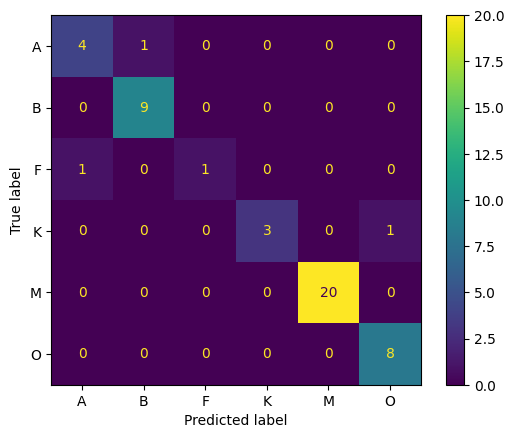

In [11]:
RF = Random_Forest(DATA[0],DATA[1],DATA[2],DATA[3]);
# prints the report and displays the confusion matrix
RF[1].plot()
print(RF[2])

# 3.1 KMeans Clustering


# 3.2 Testing Kmeans with n number of clusters

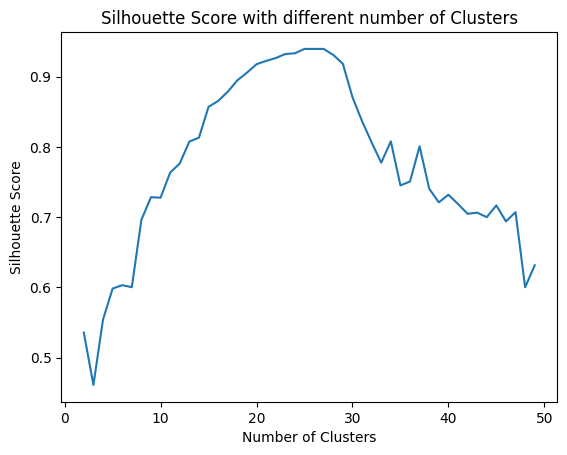

In [43]:
# Creates a copy of the data for the Kmeans algorithm
Kmeans_data = df_features

# two list to store the number of clusters and their silhouette score
number_clusters = []
silhouette_list = []
# Iterates over the range of 2-50, this representing the different number of clusters we want to test
# The data is fit and the labels are produced
# Using this to calculate the silhouette score
for cluster_num in range(2,50):
    Kmeans = KMeans(n_clusters = cluster_num)
    Kmeans.fit(Kmeans_data)
    labels = Kmeans.labels_
    silhouette_scr = silhouette_score(Kmeans_data,labels)
    number_clusters.append(cluster_num)
    silhouette_list.append(silhouette_scr)

# Plots a graph of the silhouette score against different numbers of clusters
plt.plot(number_clusters,silhouette_list)
plt.title("Silhouette Score with different number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


# 3.3 Comparing Kmeans with random init vs Kmeans ++

In [44]:
# creates a temporary list for random init and ++ init
temp_silhouette_scr_rnd = []
temp_silhouette_scr_plus = []

# repeats the clustering 10 times on the random init
# each time it adds the silhouette score to the temporary list
for _ in range(10):
    Kmeans = KMeans(n_clusters = 7,)
    Kmeans.fit(Kmeans_data)
    labels = Kmeans.labels_
    silhouette_scr = silhouette_score(Kmeans_data,labels)
    temp_silhouette_scr_rnd.append(silhouette_scr)

# Prints the average score of the random init clustering
print("This is the average silhouette score for Kmeans random",np.average(temp_silhouette_scr_rnd))

# repeats the clustering 10 times on the ++ init
# each time it adds the silhouette score to the temporary list
for _ in range(10):
    Kmeans = KMeans(n_clusters = 7,init="k-means++")
    Kmeans.fit(Kmeans_data)
    labels = Kmeans.labels_
    silhouette_scr = silhouette_score(Kmeans_data,labels)
    temp_silhouette_scr_plus.append(silhouette_scr)

# Prints the average score of the ++ init clustering
print("This is the average silhouette score for Kmeans ++ :",np.average(temp_silhouette_scr_plus))


This is the average silhouette score for Kmeans random 0.6410846408603088
This is the average silhouette score for Kmeans ++ : 0.6543165223099353


# 4.1 Multi-layer Perceptron

# 4.2 Modifying the data to work with MLPs

In [15]:
# Defines the train and test data for the MLP
train_data, test_data, train_class, test_class_list = Data_split(df_features,df_classes,74)

# Encodes the class as int 
# This is needed as MLP's cannot use string classes
class_encoder = {
    "A" : 0,
    "B" : 1,
    "F" : 2,
    "K" : 3,
    "M" : 4,
    "O" : 5,
    "G" : 6
}

train_class_encoded = []
test_class_encoded = []

# Iterates over the train and test data classes and converts them into int
for classes in train_class:
    for keys, values in class_encoder.items():
        if classes == keys:
            train_class_encoded.append(values)

for classes in test_class_list:
    for keys, values in class_encoder.items():
        if classes == keys:
            test_class_encoded.append(values)

# converts the list of int classes into arrays
train_class_encoded = np.array(train_class_encoded)
test_class_encoded = np.array(test_class_encoded)

train_data_arr = np.array(train_data)
test_data_arr = np.array(test_data)


# 4.3 Set up the test and train loader for MLPs

In [16]:
# converts the training features into float tensors
# converts the training classes into long tensors
train_data_mlp = torch.from_numpy(train_data_arr).float()
train_class_mlp = torch.from_numpy(train_class_encoded).long()

# converts the test features into float tensors
# converts the test classes into long tensors
test_data_mlp = torch.from_numpy(test_data_arr).float()
test_class_mlp = torch.from_numpy(test_class_encoded).long()

# Creates tensor data sets for the training and test data
train_dataset = TensorDataset(train_data_mlp,train_class_mlp)
test_dataset = TensorDataset(test_data_mlp,test_class_mlp)

# Creates a data loader for the training and test data 
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=20)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1)

# 4.4 Defining the MLP

In [17]:
# A class defining a Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # The input layer which takes a 1d vector of length 24
            # Converts input into a 1d vector of length 512
            nn.Linear(24, 512),

            # Batch Normalization 1#
            # Applies batch normalization to the output of the first layer
            nn.BatchNorm1d(512),

            # Activation Function #1
            # ELU function
            # Incorporates non-linearity
            # If x >= 0 then x = x
            # if x < 0 then x = alpah(exp(x)-1)
            nn.ELU(),

            # Dropout Layer #1
            # Randomly sets the output of some neurons to 0
            nn.Dropout(p=0.75),

            # Fully connected layer #1
            # - This is a fully connected layer
            # - It is comprised of 512 neurons
            # - The neurons perform a linear transformation on the input data
            # - Each neuron recieves all values from the inputted sample
            # - Each neuron applies weights to each value in the sample
            # - A bias term is then added to each neuron weighted sum
            # - Input is a 1d vector of length 512
            # - Output is a 1d vector of length 512
            nn.Linear(512, 512),

            # Batch Normalization #2
            nn.BatchNorm1d(512),

            # Activation function #2
            nn.ELU(),

            # Dropout #2
            nn.Dropout(p=0.75),

            # Fully connected layer #2
            nn.Linear(512, 512),

            # Batch Normalization #3
            nn.BatchNorm1d(512),

            # Activation Function #3
            nn.ELU(),
            
            # Dropout #3
            nn.Dropout(p=0.75),

            # Fully Connected layer #3
            nn.Linear(512, 512),

            # Batch Normalization #4
            nn.BatchNorm1d(512),
            
            # Activation function #4
            nn.ELU(),

            # Dropout #4
            nn.Dropout(p=0.75),

            # Output layer
            # - It takes an input of a 1d vector of length 512
            # - Performs linear transformation on input
            # - Converts it into a 1d vector of length 7
            # - The output represents the 7 classes in the model
            # - The value associated with each of these 7 outputs is
            # - the probability the model thinks a given sample is of a certain class
            nn.Linear(512, 7),
        )

    def forward(self, x):
        # Forward pass of the NN
        # Runs samples through the NN
        # Returns the a 1d vector of length 7
        # representing the probability of an input belonging to each class
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits






# 4.5 Training the MLP

In [25]:
# define the model
model = NeuralNetwork()


# define learning rate, optimizer, L2 regularization decay, loss method and epochs
learning_rate = 0.005
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
epochs = 3



# loop over the dataset multiple times
losses_list = []
accuracy_list = []

# Iterates over the number of epochs specified
for i in range(epochs):
  # Rests the counters that calculate accuracy for each epoch
  total_samples = 0
  correct_pred = 0
  # iterates over the training data in batches of 20
  for j,(input,targets) in enumerate(train_loader):
    # makes predictions on the training data
    y_pred = model(input)
    _, predicted = torch.max(y_pred, 1)
    # calcualtes the accuracy
    total_samples += targets.size(0)
    correct_pred += (predicted == targets).sum().item()
    # calculates the loss of during training
    loss = criterion(y_pred,targets.reshape(-1))

    
    # back propegates through the model updating the weight of neurons
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Outputs the Accuracy and Loss of each epoch
  loss_value = loss.item()
  accuracy = correct_pred/total_samples
  print("this is the loss",loss_value,"for epoch",i)
  print("this is the accuracy",accuracy,"for epoch",i)
  losses_list.append(loss_value)
  accuracy_list.append(accuracy)

print('Complete Training')

this is the loss 1.9431906938552856 for epoch 0
this is the accuracy 0.4322916666666667 for epoch 0
this is the loss 1.066316843032837 for epoch 1
this is the accuracy 0.6666666666666666 for epoch 1
this is the loss 1.3426014184951782 for epoch 2
this is the accuracy 0.71875 for epoch 2
Complete Training


# 4.6 Testing the model on test data

[5, 4, 4, 5, 1, 4, 0, 1, 0, 4, 4, 4, 5, 1, 4, 1, 1, 4, 4, 4, 3, 2, 5, 4, 5, 4, 0, 5, 1, 5, 3, 5, 4, 4, 4, 0, 4, 1, 1, 1, 4, 0, 2, 4, 3, 3, 4, 4]
[1, 4, 4, 5, 1, 4, 1, 1, 1, 4, 4, 4, 5, 1, 4, 1, 1, 4, 4, 4, 1, 1, 5, 4, 1, 4, 1, 5, 1, 5, 1, 5, 4, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 5, 4, 4]
- Test Loss:  0.686445706669474 

- Accuracy:  72.91666666666667 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.43      1.00      0.60         9
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       1.00      1.00      1.00        20
           5       0.86      0.75      0.80         8

    accuracy                           0.73        48
   macro avg       0.38      0.46      0.40        48
weighted avg       0.64      0.73      0.66        48

- Confusion Matrix: 
 


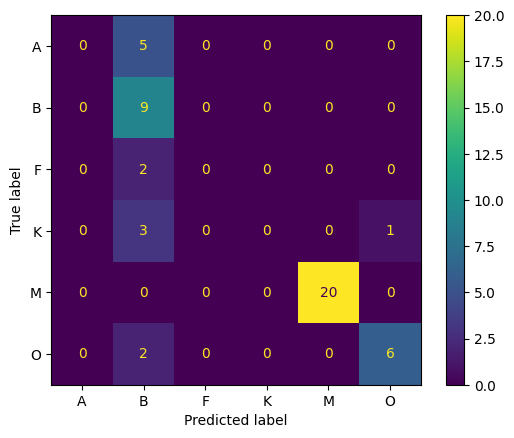

In [24]:
# Function to test the accuracy of a trained model on test data
def testing_accuracy(model, data_loader):
    # Puts the model in evaluation mode
    model.eval()
    # counters to track the loss and accuracy of the model
    test_loss = 0
    correct = 0
    device = 'cpu'

    y_pred = []
    y_actu = []
    with torch.no_grad():
        # Iterates over the test loader
        for data, target in data_loader:
            # Makes predictions on the testing data
            data, target = data.to(device), target.to(device)
            output = model(data)
            # Sums up the batch loss
            test_loss += F.cross_entropy(output, target, reduction='sum').item()  
            _, predicted = torch.max(output, 1)
            pred = output.argmax(dim=1, keepdim=True)
            correct += (predicted == target).sum().item()
            y_pred.extend(torch.flatten(pred).tolist()) 
            y_actu.extend(target.tolist())    
    # Creates a confusion matrix of the results 
    # Calculates the loss and accuracy of the model on the test data
    cm = confusion_matrix(y_actu,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=star_groups)
    test_loss /= len(data_loader.dataset)
    accuracy = 100*correct/len(test_loader.dataset)
    print(y_actu)
    print(y_pred)
    report = classification_report(y_actu,y_pred, zero_division=0)
    report_dict = classification_report(y_actu,y_pred, zero_division=0, output_dict=True)
    return(test_loss, accuracy, display, report, report_dict)

test_results_mlp = testing_accuracy(model, test_loader);

print("- Test Loss: ", test_results_mlp[0], "\n")
print("- Accuracy: ", test_results_mlp[1], "\n")
print( test_results_mlp[3])
print("- Confusion Matrix: \n \n",  test_results_mlp[2].plot())

# 5.1 CNN


# 5.2 Creating a train and test loader for CNN

In [26]:
# Creates a train loader and a test loader for CNN
train_loader_cnn = torch.utils.data.DataLoader(train_dataset,batch_size=24)
test_loader_cnn = torch.utils.data.DataLoader(test_dataset,batch_size=24)


# 5.3 Defining the CNN model

In [27]:
# define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First convolutional layer
        # Convolutional layer extract features from the input
        # Takes an input of 1d vectors length 24
        # Outputs a 1d vector of length 16
        # Has a kernel size of 
        self.conv1 = nn.Conv1d(24,16,3)    
        # Second convolutional layer
        self.conv2 = nn.Conv1d(16,24,3)

        # first linear layer
        # contains 128 neurons
        # performs a linear transformation on the data
        # takes an input of a 1d vector length 9
        # Outputs a 1d vector of length 128
        self.fc1 = nn.Linear(9,128)
        
        # Output layer
        # takes input of 1d vector of length 128
        # Output of 1d vecotr of length 7
        # values of the ouput vector are the probability the model thinks an input belongs to a certain class
        self.fc2 = nn.Linear(128, 7)

    def forward(self, x):

        x = self.conv1(x)
        # activation function #1
        # Performs adds non linearality to model
        x = F.relu(x)

        # Pools together the convolution layers
        x = F.max_pool1d(x,2)

        x = self.conv2(x)
        x = F.relu(x)

        
        # Reshape x before passing it to the fully connected layer
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        return F.log_softmax(x, dim=-1)
    

    




# 5.4 Training the CNN model

In [28]:
# defines the model
network = CNN()

# defines the loss method, the learning rate, optimizer and the number of epochs
criterion_cnn = nn.CrossEntropyLoss()
learning_rate = 0.005
optimizer_cnn = torch.optim.Adam(network.parameters(),lr=learning_rate)
epochs = 3

def train_cnn(network, train_loader, optimizer, criterion):
    
    network.train()
    # Iterates over the number of epochs defined
    for i in range(epochs+1):
        # Iterates over the train loader in batches of 24
        for data, target in train_loader:
           
            optimizer.zero_grad()
            # finds the prediction the model makes on the training data
            output = network(data)
            
            # back propegates through the model updating the weight of neurons
            loss = criterion(output, target) 
            loss.backward()
            optimizer.step()

train_cnn(network,train_loader_cnn,optimizer_cnn,criterion_cnn)

# 5.5 Testing the CNN model on test data

In [29]:
# Test the accuracy of the CNN model
def testing_accuracy_cnn():
    # Puts the model into evaluation mode
    network.eval()
    # counters to track the loss and accuracy of the model
    test_loss = 0
    correct = 0
    device = 'cpu'

    y_pred = []
    y_actu = []
    with torch.no_grad():
        # Iterates throught the test loader
        for data, target in test_loader_cnn:
            # Makes predictions on the test data
            data, target = data.to(device), target.to(device)
            output = network(data)
            # sums up batch loss
            test_loss += F.cross_entropy(output, target, reduction='sum').item()  
            _, predicted = torch.max(output, 1)
            # calculates the number of correct predictions in the batch
            pred = output.argmax(dim=1, keepdim=True)
            correct += (predicted == target).sum().item()
            y_pred.extend(torch.flatten(pred).tolist()) 
            y_actu.extend(target.tolist())
    # Creates a confusion matrix of the results
    cm = confusion_matrix(y_actu,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=star_groups)
    # Calculates test loss and accuracy
    report = classification_report(y_actu,y_pred, zero_division=0)
    report_dict = classification_report(y_actu,y_pred, zero_division=0, output_dict=True)
    test_loss /= len(test_loader_cnn.dataset)
    accuracy = 100*correct/len(test_loader_cnn.dataset)

    return(test_loss, accuracy, display, report, report_dict)

# 5.6 Displaying the Output of the CNN

- Test Loss:  1.7418909867604573 

- Accuracy:  39.583333333333336 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.40      0.90      0.55        20
           5       1.00      0.12      0.22         8

    accuracy                           0.40        48
   macro avg       0.23      0.17      0.13        48
weighted avg       0.33      0.40      0.27        48

- Confusion Matrix: 
 


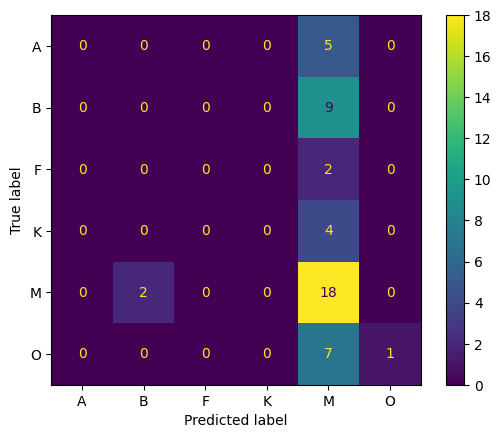

In [30]:
test_results_cnn = testing_accuracy_cnn()
# outputs the loss, accuracy and confusion matrix of the model
print("- Test Loss: ", test_results_cnn[0], "\n")
print("- Accuracy: ", test_results_cnn[1], "\n")
print(test_results_cnn[3])
print("- Confusion Matrix: \n \n",  test_results_cnn[2].plot())

# 6.1 Comparing the Results of the Models

# 6.2 Creating Dictionary of Results

In [39]:
# A dictionary to store all evaluation metrics for RF, MLP and CNN
comparison_dict = {
    "model": ["Random Forest", "MLP", "CNN"],
    "Accuracy": [RF[0]["accuracy"],test_results_mlp[4]["accuracy"],test_results_cnn[4]["accuracy"]],
    "Precision": [(RF[0])["weighted avg"]["precision"],(test_results_mlp[4])["weighted avg"]["precision"],(test_results_cnn[4])["weighted avg"]["precision"]],
    "Recall": [(RF[0])["weighted avg"]["recall"],(test_results_mlp[4])["weighted avg"]["recall"],(test_results_cnn[4])["weighted avg"]["recall"]],
    "F1-score": [(RF[0])["weighted avg"]["f1-score"],(test_results_mlp[4])["weighted avg"]["f1-score"],(test_results_cnn[4])["weighted avg"]["f1-score"]]
    
}

# 6.3 Graphing the results


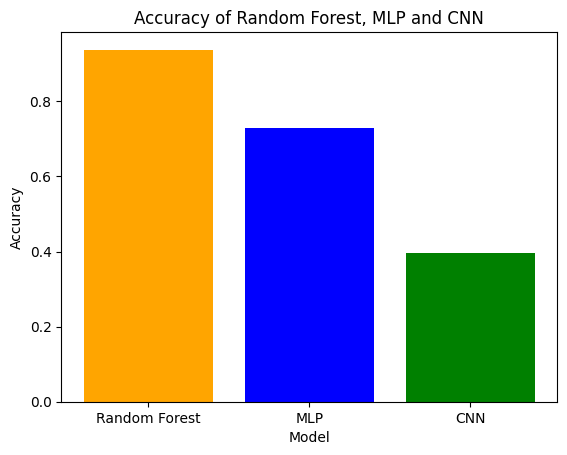

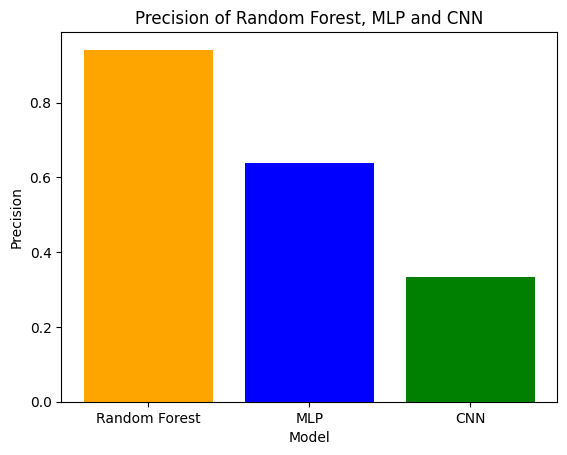

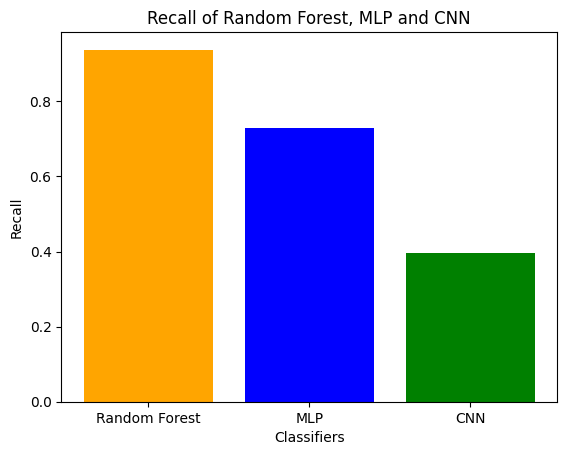

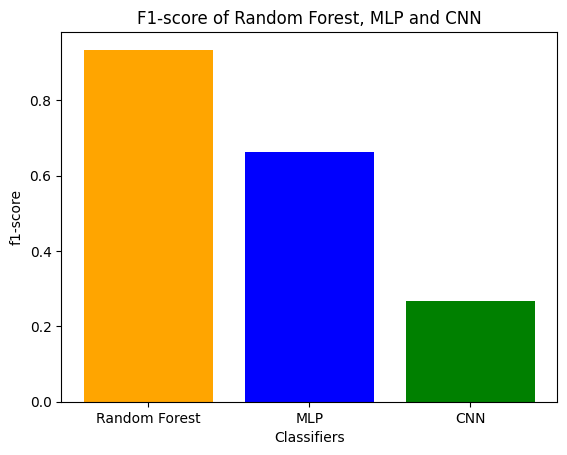

               Accuracy  Precision    Recall  F1-score
model                                                 
Random Forest  0.937500   0.941898  0.937500  0.933701
MLP            0.729167   0.639881  0.729167  0.662500
CNN            0.395833   0.333333  0.395833  0.267806
This is the average silhouette score for Kmeans ++ : 0.6543165223099353


In [45]:
color = ['orange','blue','green']

# Plots the 4 metrics for each model
plt.bar(comparison_dict['model'],comparison_dict['Accuracy'], color=color)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title("Accuracy of Random Forest, MLP and CNN")
plt.show()

plt.bar(comparison_dict['model'],comparison_dict['Precision'], color=color)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title("Precision of Random Forest, MLP and CNN")
plt.show()

plt.bar(comparison_dict['model'],comparison_dict['Recall'], color=color)
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.title("Recall of Random Forest, MLP and CNN")
plt.show()

plt.bar(comparison_dict['model'],comparison_dict['F1-score'], color=color)
plt.xlabel('Classifiers')
plt.ylabel('f1-score')
plt.title("F1-score of Random Forest, MLP and CNN")
plt.show()

# Prints out the metric df
comparison_df = pd.DataFrame(comparison_dict)
comparison_df.set_index("model",drop=True,inplace=True)
print(comparison_df)

# Prints the metric for Kmeans
print("This is the average silhouette score for Kmeans ++ :",np.average(temp_silhouette_scr_plus))